In [3]:
import pandas as pd 
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%pip install nltk
from nltk import FreqDist
from nltk import ngrams
import numpy as np
from nltk import FreqDist
import matplotlib as mpl
%matplotlib inline


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     -------------------------------------- 42.0/42.0 kB 689.8 kB/s eta 0:00:00
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 24.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 24.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/268.5 kB ? eta -:--:--
   ---------------------------------------- 268.5/268.5 kB ? eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
def generate_frequency(text_list):
    fdist =  FreqDist()
    for i in text_list:
        words = i.split(' ')
        words = [word for word in words if word != '']
        words = ngrams(words,1)
        for x in words:
            fdist[x[0]]+=1
    return fdist

In [5]:
df = pd.read_csv('../Dataset/cleanedRedditSuicide.csv')

In [6]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [7]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

In [8]:
cmap = plt.cm.Blues(np.linspace(0,1,20)) 
cmap = mpl.colors.ListedColormap(cmap[-9:,:-1]) 

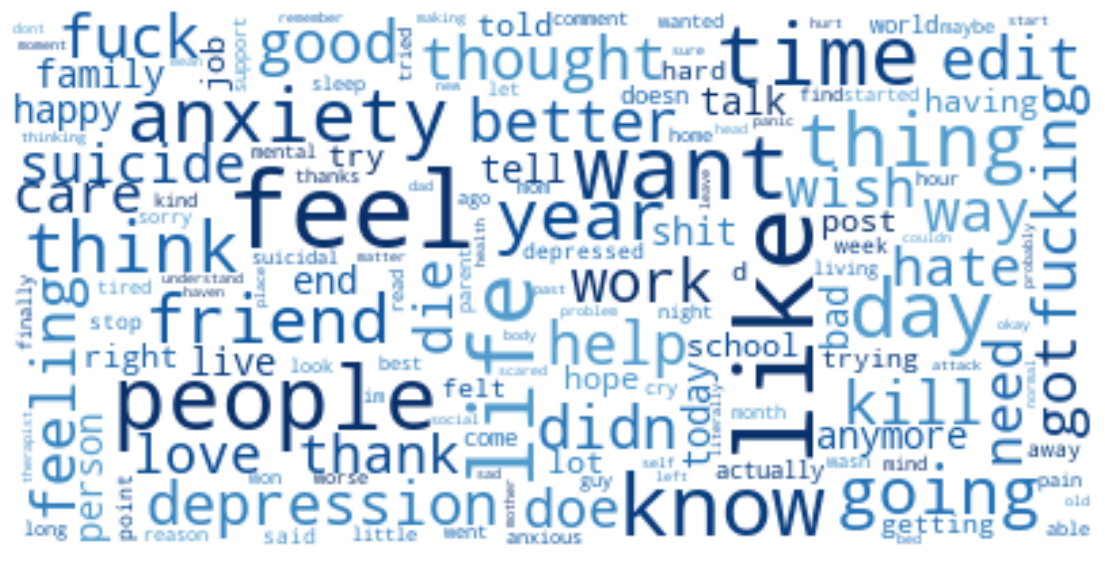

In [9]:

wordcloud = WordCloud(background_color="white",max_font_size=40,colormap=cmap).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
cmap = plt.cm.Oranges(np.linspace(0,1,20)) 
cmap = mpl.colors.ListedColormap(cmap[-9:,:-1]) 

In [11]:
df = pd.read_csv('../Dataset/cleanedTwitterSuicide.csv')

In [12]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [13]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

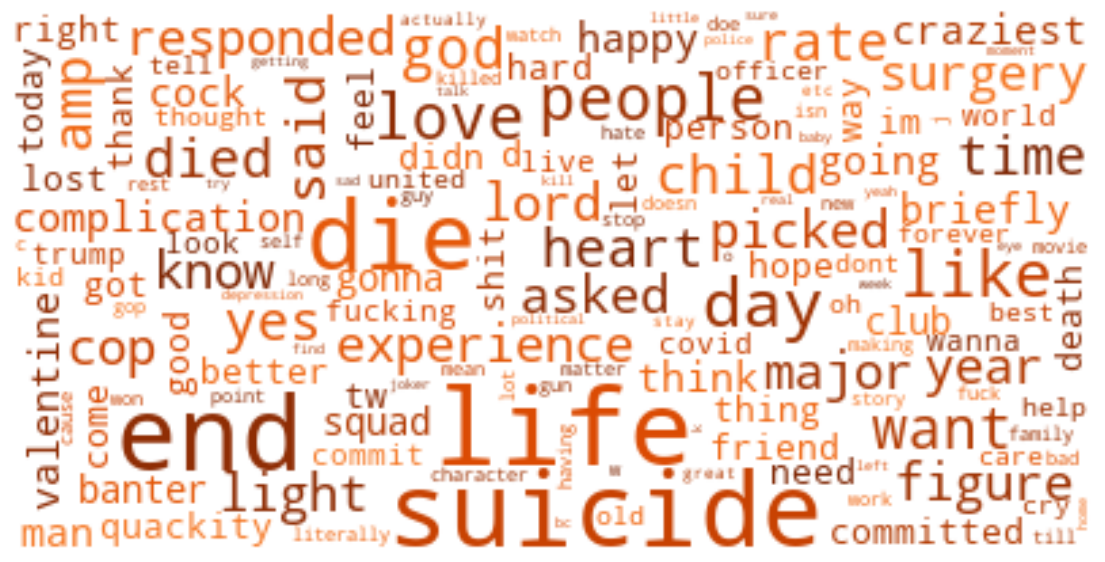

In [14]:
wordcloud = WordCloud(background_color="white",max_font_size=40, colormap=cmap).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
